In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [6]:
y_train.shape

(50000, 1)

In [7]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

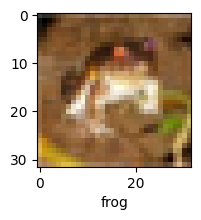

In [10]:
plot_sample(X_train, y_train, 0)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [31]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics =['accuracy'])
ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.3094 - loss: 1.9252
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.4172 - loss: 1.6481
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 86ms/step - accuracy: 0.4520 - loss: 1.5547
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 84ms/step - accuracy: 0.4775 - loss: 1.4815
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 87ms/step - accuracy: 0.4952 - loss: 1.4309


In [32]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4379 - loss: 1.5834


[1.5831438302993774, 0.43299999833106995]

In [33]:
# from sklearn.metrics import confusion_matrix, classification_report

# y_pred = ann.predict(X_test)
# y_pred_classes=[np.argmax(element) for element in y_pred]

# print(classification_report(y_pred, y_pred_classes))

In [34]:
cnn = models.Sequential([

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
cnn.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics =['accuracy'])

In [36]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.2240 - loss: 2.1169
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.4067 - loss: 1.6596
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.4692 - loss: 1.4770
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.5156 - loss: 1.3632
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.5457 - loss: 1.2836
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.5743 - loss: 1.2136
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 39ms/step - accuracy: 0.5937 - loss: 1.1556
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.6108 - loss: 1.1124
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6278 - loss: 1.0604
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.6432 - loss: 1.0167


In [37]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6379 - loss: 1.0374


[1.0480910539627075, 0.6360999941825867]

In [38]:
y_test = y_test.reshape(-1,)

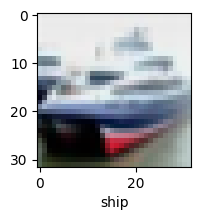

In [39]:
plot_sample(X_test,y_test,1)

In [40]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [41]:
y_classes = [np.argmax(element) for element in y_pred]

In [42]:
y_classes[:5]

[3, 1, 1, 0, 6]

In [43]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

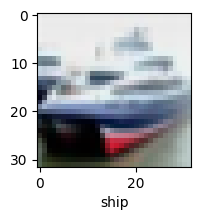

In [44]:
plot_sample(X_test,y_test,1)

In [45]:
classes[y_classes[1]]

'automobile'

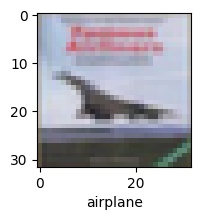

In [46]:
plot_sample(X_test,y_test,3)

In [47]:
classes[y_classes[3]]

'airplane'

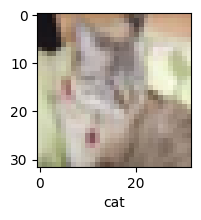

In [48]:
plot_sample(X_test,y_test,8)

In [49]:
classes[y_classes[8]]

'cat'

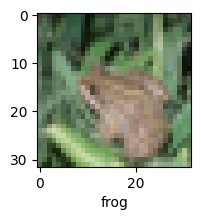

In [50]:
plot_sample(X_test,y_test,4)

In [51]:
classes[y_classes[4]]

'frog'